# Análise dos microdados do ENEM 2022

In [1]:
!pip install watermark

In [2]:
# Instalação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import watermark

In [3]:
# Verificando as versões dos pacotes
%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

watermark : 2.3.1
seaborn   : 0.11.2
re        : 2.2.1
numpy     : 1.21.5
matplotlib: 3.5.2
pandas    : 1.4.4



In [4]:
microdadosEnem = pd.read_csv("dados\MICRODADOS_ENEM_2022.csv", sep=';',encoding='ISO-8859-1')

In [5]:
# Vericando quantas linhas e quantas colunas
microdadosEnem.shape

(3476105, 76)

In [6]:
# Verificando os tipos de dados de cada couluna
microdadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [7]:
# Aumentando a visualização de linhas
pd.options.display.max_rows = 100

In [8]:
# Verificando se existem valores nulos
microdadosEnem.isnull().sum()

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2213361
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2524161
NO_MUNICIPIO_ESC          2524161
CO_UF_ESC                 2524161
SG_UF_ESC                 2524161
TP_DEPENDENCIA_ADM_ESC    2524161
TP_LOCALIZACAO_ESC        2524161
TP_SIT_FUNC_ESC           2524161
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN               1120710
CO_PROVA_CH                982663
CO_PROVA_LC   

In [9]:
pd.set_option('display.max_columns', 80)

In [10]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [11]:
colunasSelecionadas = ['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA',\
                             'TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO',\
                             'NO_MUNICIPIO_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC',\
                             'NO_MUNICIPIO_PROVA','SG_UF_PROVA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC',\
                              'TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA',\
                              'TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4',\
                              'NU_NOTA_COMP5','NU_NOTA_REDACAO','Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008',\
                             'Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021',\
                             'Q022','Q23','Q024','Q025']

In [12]:
mde = microdadosEnem.filter(items=colunasSelecionadas) 

In [13]:
mde.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q024,Q025
0,210057943671,14,M,2,2,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A
1,210057516120,14,M,2,1,1,1,16,1,NaN,NaN,NaN,NaN,NaN,NaN,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,E,B
2,210057280536,5,F,1,2,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Presidente Tancredo Neves,BA,1,1,1,1,421.1,546.0,498.8,565.3,1,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,B
3,210055724397,6,M,1,3,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Cariacica,ES,1,1,1,1,490.7,388.6,357.8,416.0,1,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B
4,210055097896,4,M,0,3,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Salinópolis,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A


In [14]:
# Verificando um amostra aleatória dos dados
mde.sample(10)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q024,Q025
2832859,210056921554,3,F,0,3,1,2,0,2,1.0,NaN,NaN,NaN,NaN,NaN,Araucária,PR,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,D,F,4,C,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,E,B,B
114462,210057856142,3,M,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,São Bernardo do Campo,SP,1,1,1,1,518.3,630.2,569.0,556.5,0,1.0,160.0,200.0,140.0,140.0,80.0,720.0,E,F,D,D,3,J,A,C,D,B,A,B,B,B,A,B,A,B,B,A,A,C,B,B
1304835,210056539595,4,M,1,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Montes Claros,MG,1,1,1,1,472.4,631.0,662.8,599.6,0,1.0,180.0,200.0,160.0,180.0,120.0,840.0,E,E,C,D,4,D,A,B,D,B,B,B,B,B,A,B,A,B,D,B,A,D,B,B
3260942,210055741695,2,F,1,2,2,2,0,2,1.0,Capelinha,MG,2.0,1.0,1.0,Capelinha,MG,1,1,1,1,464.1,552.9,576.3,456.1,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,B,C,A,A,5,B,B,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A
2613504,210055374761,3,M,1,1,1,2,0,2,1.0,Rio Brilhante,MS,2.0,1.0,1.0,Rio Brilhante,MS,1,1,1,1,488.7,533.3,440.7,458.5,1,1.0,60.0,80.0,80.0,60.0,0.0,280.0,C,E,A,A,4,H,A,D,D,C,B,B,B,B,A,A,A,B,B,A,A,A,B,B
2183609,210055155041,6,F,1,3,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,Bom Jesus,PI,1,1,1,1,390.6,425.6,356.1,401.6,0,1.0,80.0,120.0,80.0,120.0,0.0,400.0,B,B,A,A,5,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A
1014028,210055038652,6,F,1,3,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Aracaju,SE,1,1,1,1,447.1,422.2,408.3,423.7,1,1.0,100.0,120.0,100.0,100.0,140.0,560.0,D,E,B,B,3,B,A,B,D,A,A,B,B,A,A,A,A,A,B,B,A,C,B,B
3460352,210055278083,2,F,1,3,1,2,0,2,1.0,NaN,NaN,NaN,NaN,NaN,Salvador,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,C,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A
886478,210057757956,4,F,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Poções,BA,1,1,1,1,468.1,339.2,421.1,473.2,1,1.0,120.0,120.0,100.0,120.0,40.0,500.0,B,E,C,F,3,B,A,B,D,A,A,B,A,B,A,B,A,A,B,B,A,D,B,B
871402,210055515391,6,F,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Curitiba,PR,1,1,1,1,501.9,568.8,575.4,521.2,1,1.0,120.0,120.0,140.0,120.0,80.0,580.0,G,G,D,D,3,E,A,B,B,B,B,B,B,B,A,A,A,A,B,A,A,D,B,B


## EDA - Parte 1
### Separação das variáveis categóricas e numéricas

In [15]:
mde.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q024', 'Q025'],
      dtype='object')

In [16]:
mde.dtypes

NU_INSCRICAO                int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
NO_MUNICIPIO_ESC           object
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
NO_MUNICIPIO_PROVA         object
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
NU_NOTA_CN                float64
NU_NOTA_CH                float64
NU_NOTA_LC                float64
NU_NOTA_MT                float64
TP_LINGUA                   int64
TP_STATUS_REDACAO         float64
NU_NOTA_COMP1             float64
NU_NOTA_COMP2             float64
NU_NOTA_COMP3 

In [17]:
varCategoricas = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL','TP_COR_RACA', 'TP_NACIONALIDADE',\
                  'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU','TP_ESCOLA', 'TP_ENSINO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC','TP_LINGUA',\
                  'TP_STATUS_REDACAO','TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC','NO_MUNICIPIO_PROVA', \
                  'SG_UF_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT',  'TP_LINGUA', \
                  'TP_STATUS_REDACAO','Q001', 'Q002', 'Q003', 'Q004','Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',\
                  'Q012', 'Q013','Q014','Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q024', 'Q025']

In [18]:
varNumericas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_COMP1',\
                'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

### Explorando as variáveis numéricas

In [19]:
# Resumo das variáveis numéricas
mde[varNumericas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06
mean,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,1.193923e+02,1.409609e+02,1.148686e+02,1.294384e+02,1.138195e+02,6.184797e+02
std,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,3.700626e+01,5.353708e+01,4.102659e+01,4.268095e+01,5.982160e+01,2.122125e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02
50%,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,1.200000e+02,1.400000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.200000e+02
75%,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,1.400000e+02,2.000000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.600000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


In [20]:
# Alteração de a forma de visualização dos números 
pd.set_option('float_format','{:.1f}'.format)

In [21]:
# Resumo das variáveis numéricas
mde[varNumericas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,2355395.0,2493442.0,2493442.0,2355395.0,2493442.0,2493442.0,2493442.0,2493442.0,2493442.0,2493442.0
mean,495.9,527.0,517.4,542.5,119.4,141.0,114.9,129.4,113.8,618.5
std,72.0,81.5,77.6,116.0,37.0,53.5,41.0,42.7,59.8,212.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,440.5,477.0,468.4,449.0,100.0,120.0,100.0,120.0,80.0,520.0
50%,485.6,529.9,525.5,530.8,120.0,140.0,120.0,120.0,120.0,620.0
75%,543.3,581.9,573.2,622.4,140.0,200.0,140.0,160.0,160.0,760.0
max,875.3,839.2,801.0,985.7,200.0,200.0,200.0,200.0,200.0,1000.0


In [22]:
# Verificando se há dados ausentes
mde[varNumericas].isnull().sum()

NU_NOTA_CN         1120710
NU_NOTA_CH          982663
NU_NOTA_LC          982663
NU_NOTA_MT         1120710
NU_NOTA_COMP1       982663
NU_NOTA_COMP2       982663
NU_NOTA_COMP3       982663
NU_NOTA_COMP4       982663
NU_NOTA_COMP5       982663
NU_NOTA_REDACAO     982663
dtype: int64

In [23]:
# Em uma primeira análise por conta do número alto de valores ausentes, vamos remover esses valores
mde.dropna(axis=0, inplace=True)

In [24]:
# Verificando se há dados ausentes
mde[varNumericas].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [25]:
mde.shape

(681900, 57)

In [26]:
mde.sample(10)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q024,Q025
356076,210057766987,2,M,1,1,1,2,0,2,1.0,João Pessoa,PB,2.0,1.0,1.0,João Pessoa,PB,1,1,1,1,451.7,464.2,361.2,381.5,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,D,E,B,C,4,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,B,B
1533110,210057308235,4,M,1,2,1,2,0,2,1.0,Salvador,BA,2.0,1.0,1.0,Salvador,BA,1,1,1,1,520.4,502.1,525.4,488.6,0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,B,E,D,B,4,C,A,C,C,A,A,B,B,B,B,A,A,A,C,A,A,E,A,B
2127078,210054765923,3,M,1,1,1,2,0,3,1.0,Salvador,BA,4.0,1.0,1.0,Salvador,BA,1,1,1,1,454.4,534.4,515.4,512.3,0,1.0,140.0,140.0,120.0,140.0,100.0,640.0,G,G,F,D,3,G,A,D,D,B,A,B,B,B,A,B,A,B,B,B,B,E,B,B
640838,210054703495,3,F,1,1,1,2,0,2,1.0,Brasília,DF,2.0,1.0,1.0,Brasília,DF,1,1,1,1,363.5,458.0,331.1,364.3,1,1.0,120.0,120.0,120.0,120.0,40.0,520.0,E,F,B,B,4,D,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,A,B
3276246,210055175460,2,F,1,3,1,2,0,3,1.0,Araguaína,TO,4.0,1.0,1.0,Araguaína,TO,1,1,1,1,466.8,549.3,555.4,517.5,0,1.0,160.0,200.0,200.0,180.0,200.0,940.0,E,F,D,D,5,J,A,D,D,C,A,B,A,C,A,B,A,A,D,A,B,E,B,B
2229583,210056498054,3,F,1,1,1,2,0,2,1.0,Itaquaquecetuba,SP,2.0,1.0,1.0,Itaquaquecetuba,SP,1,1,1,1,436.5,525.1,502.7,577.9,0,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,C,4,D,A,C,D,B,B,B,B,B,A,B,A,A,B,A,A,E,B,B
1819978,210056613040,2,M,1,3,1,2,0,3,1.0,Tianguá,CE,4.0,1.0,1.0,Tianguá,CE,1,1,1,1,615.1,606.7,639.3,702.1,0,1.0,160.0,200.0,180.0,180.0,180.0,900.0,G,F,D,D,3,F,A,C,D,C,A,B,A,B,A,B,A,B,B,A,A,D,A,B
3081095,210057737541,4,F,1,3,1,2,0,2,1.0,Teresina,PI,2.0,1.0,1.0,Teresina,PI,1,1,1,1,506.6,427.3,369.7,433.0,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,F,F,B,B,4,C,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,B
917157,210055363339,3,F,1,3,1,2,0,2,1.0,Aratuba,CE,2.0,1.0,1.0,Aratuba,CE,1,1,1,1,462.2,490.8,388.6,436.3,1,1.0,120.0,100.0,100.0,140.0,40.0,500.0,D,D,A,A,3,B,A,B,C,A,B,A,A,B,A,A,A,A,B,B,A,C,A,B
1562269,210056114139,2,F,1,1,1,2,0,3,1.0,São Paulo,SP,4.0,1.0,1.0,São Paulo,SP,1,1,1,1,430.8,561.5,539.6,546.8,0,1.0,160.0,200.0,120.0,200.0,200.0,880.0,H,G,E,D,3,H,B,E,D,B,C,B,B,B,A,B,A,B,E,B,B,D,D,B


In [28]:
# Verificando se houve alteração nos valores estatísticos
mde[varNumericas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,681900.0,681900.0,681900.0,681900.0,681900.0,681900.0,681900.0,681900.0,681900.0,681900.0
mean,498.2,530.1,520.2,549.6,121.5,145.6,117.8,133.0,119.2,637.2
std,71.1,78.6,76.2,116.1,36.4,52.5,40.0,42.3,59.9,209.6
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,442.4,481.2,472.1,455.6,120.0,120.0,100.0,120.0,80.0,540.0
50%,489.7,533.7,529.1,541.3,120.0,160.0,120.0,120.0,120.0,640.0
75%,547.9,584.0,575.4,631.2,140.0,200.0,140.0,160.0,160.0,800.0
max,875.3,839.2,801.0,985.7,200.0,200.0,200.0,200.0,200.0,1000.0


#### Algumas observações:
- As colunas NU_NOTA_CH, NU_NOTA_COMP1, NU_NOTA_REDACAO parecem ter uma distribução bastante simétrica (média e mediana não são muito diferentes).

- As colunas NU_NOTA_CN, NU_NOTA_MT e NU_NOTA_COMP4,  parecem estar inclinadas para a direita (média maior do que a mediana)

- A coluna NU_NOTA_LC, NU_NOTA_COMP2, NU_NOTA_COMP3 e NU_NOTA_COMP5 parecem estar inclinadas para a esquerda (média menor do que a mediana)

<AxesSubplot:>

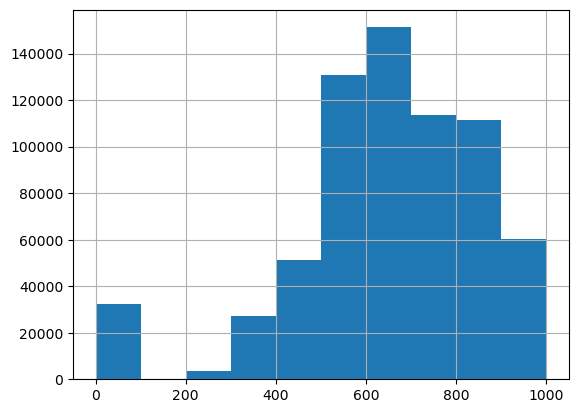

In [29]:
mde['NU_NOTA_REDACAO'].hist()

<AxesSubplot:>

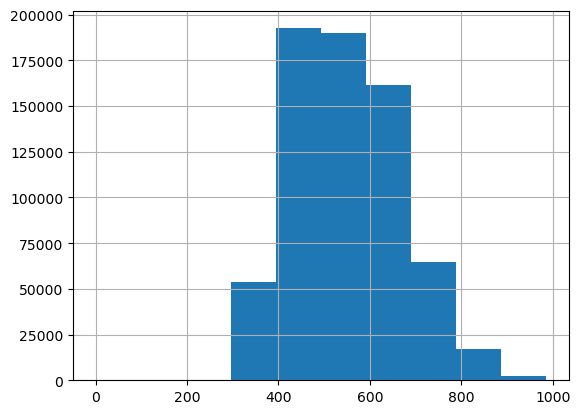

In [30]:
mde['NU_NOTA_MT'].hist()

### Explorando as variáveis categóricas

In [36]:
# Resumo dasvariáveis categóricas
mde[varCategoricas].astype('object').describe()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LINGUA,TP_STATUS_REDACAO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q024,Q025
count,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900.0,681900,681900,681900,681900.0,681900.0,681900.0,681900.0,681900,681900,681900,681900,681900,681900,681900,681900.0,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900,681900
unique,681900,20,2,5,6,5,1,1,2,2.0,5223,27,2,8.0,4.0,2.0,4.0,1712,27,1,1,1,1,2,8.0,8,8,6,6,20,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,5,2
top,210056717205,3,F,1,1,1,2,0,2,1.0,São Paulo,SP,0,1.0,2.0,1.0,1.0,São Paulo,SP,1,1,1,1,0,1.0,E,E,D,B,4,B,A,B,C,B,A,B,B,B,A,B,A,A,B,A,A,D,A,B
freq,1,312567,381323,656907,328550,666878,681900,681900,507968,679324.0,36350,136028,426948,649703.0,424613.0,659716.0,676718.0,35629,136254,681900,681900,681900,681900,426948,649703.0,221758,253483,170985,243956,258654,161430,603083,371888,317141,308747,505071,620916,349290,488397,562045,403994,647989,448566,387387,535967,475094,238349,268399,636554


### Algumas observações sobre as variáveis categóricas

Através da observação das variáveis categóricas podemos observar que:

- A maioria de candidatos que fizeram a prova do ENEM em 2023 foram da faizxa etária 3 que são candidatos de 18 anos

- A maioria é do sexo feminino

- A maioria são solteiros(as)

- A maioria são Brasileiros

- Estão cursando e concluiriam o Ensino Médio em 2022

- A maioria é de escola pública

- A maioria escolheu a prova de lingua estrangeira

In [45]:
# Listando o total por categoria de cada variável categórica
for col in varCategoricas:
    print(f'Total de Registros por categoria da variável {col}:')
    print(mde[col].value_counts())
    print()

Total de Registros por categoria da variável NU_INSCRICAO:
210056717205    1
210056396698    1
210056077912    1
210057468669    1
210056461212    1
               ..
210057357694    1
210054654361    1
210057806986    1
210056004388    1
210056699189    1
Name: NU_INSCRICAO, Length: 681900, dtype: int64

Total de Registros por categoria da variável TP_FAIXA_ETARIA:
3     312567
2     302811
4      44212
5      10146
1       6226
6       2672
7        933
11       583
8        484
12       283
9        275
13       210
10       208
14       125
15        72
16        46
17        33
18         6
19         6
20         2
Name: TP_FAIXA_ETARIA, dtype: int64

Total de Registros por categoria da variável TP_SEXO:
F    381323
M    300577
Name: TP_SEXO, dtype: int64

Total de Registros por categoria da variável TP_ESTADO_CIVIL:
1    656907
0     18024
3      4357
2      2511
4       101
Name: TP_ESTADO_CIVIL, dtype: int64

Total de Registros por categoria da variável TP_COR_RACA:
1    32855

B    636554
A     45346
Name: Q025, dtype: int64

